In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA, TruncatedSVD

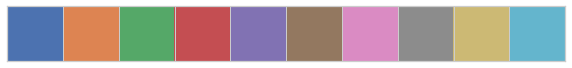

In [3]:
#set colors
sns.set(style="whitegrid", palette="deep")
sns.palplot(sns.color_palette())

In [4]:
def get_idx(data, i):
    return data.applymap(lambda x: x[i] if pd.notnull(x) else np.nan)

In [116]:
def clean_recipe(file):
    df = pd.read_pickle(file)
    df = df.drop([1, 2], axis=1).drop(["KPCA"], axis=0)
    df.columns = ["TR-3", "TR-4", "TR-5", "SR-5", "SR-4", "SR-3"]
    df = df[["TR-3", "TR-4", "TR-5", "SR-3", "SR-4", "SR-5"]]
    return df

def clean_user(file):
    df = pd.read_pickle(file)
    df = df.drop(["MinCutNN"], axis=1)
    return df

In [117]:
recipe_Rhat_com = clean_recipe("results/recipe_Rhat_com.pkl")
recipe_Rhat_int = clean_recipe("results/recipe_Rhat_int.pkl")
recipe_R_com = clean_recipe("results/recipe_R_com.pkl")
recipe_R_int = clean_recipe("results/recipe_R_int.pkl")
user_Uhat_com = clean_user("results/user_Uhat_com.pkl")
user_Uhat_int = clean_user("results/user_Uhat_int.pkl")
user_U_com = clean_user("results/user_U_com.pkl")
user_U_int = clean_user("results/user_U_int.pkl")

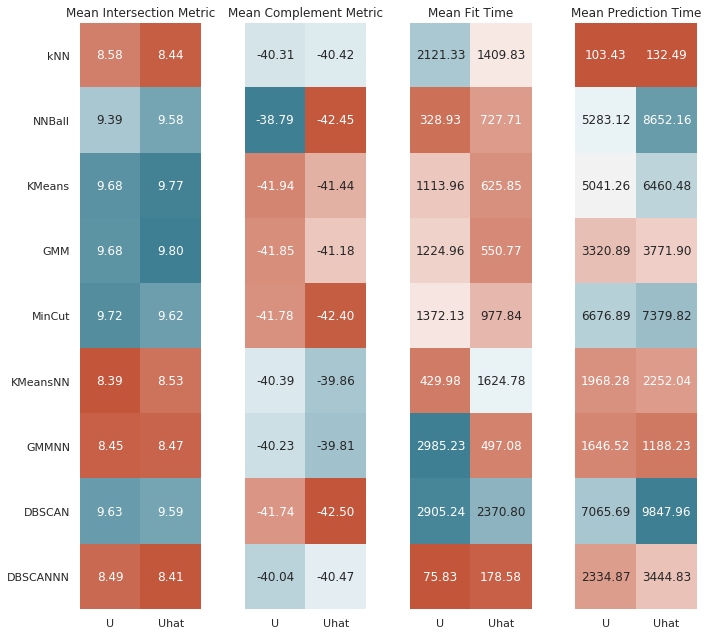

In [119]:
fig, ax = plt.subplots(1, 4, figsize=(10,9))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Uint = get_idx(user_U_int, 0).mean().rename('U')
Uhatint = get_idx(user_Uhat_int, 0).mean().rename('Uhat')
ints = pd.concat([Uint, Uhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")

#Complement
Ucom = get_idx(user_U_com, 0).mean().rename('U')
Uhatcom = get_idx(user_Uhat_com, 0).mean().rename('Uhat')
coms = pd.concat([Ucom, Uhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Uhat = (get_idx(user_Uhat_com, 1) + get_idx(user_Uhat_int, 1)).mean().rename('Uhat')/2
U = (get_idx(user_U_com, 1) + get_idx(user_U_int, 1)).mean().rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Uhat = (get_idx(user_Uhat_com, 2) + get_idx(user_Uhat_int, 2)).mean().rename('Uhat')/2
U = (get_idx(user_U_com, 2) + get_idx(user_U_int, 2)).mean().rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("figs/user_rdr.pdf", bbox_inches="tight")
plt.show()

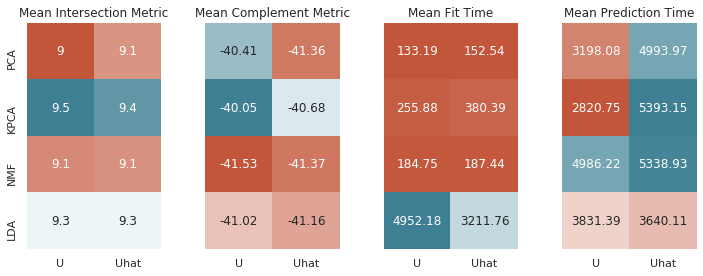

In [120]:
fig, ax = plt.subplots(1, 4, figsize=(10,4))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Uint = get_idx(user_U_int, 0).mean(axis=1).rename('U')
Uhatint = get_idx(user_Uhat_int, 0).mean(axis=1).rename('Uhat')
ints = pd.concat([Uint, Uhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False)
ax[0].set_title("Mean Intersection Metric")

#Complement
Ucom = get_idx(user_U_com, 0).mean(axis=1).rename('U')
Uhatcom = get_idx(user_Uhat_com, 0).mean(axis=1).rename('Uhat')
coms = pd.concat([Ucom, Uhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Uhat = (get_idx(user_Uhat_com, 1) + get_idx(user_Uhat_int, 1)).mean(axis=1).rename('Uhat')/2
U = (get_idx(user_U_com, 1) + get_idx(user_U_int, 1)).mean(axis=1).rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Uhat = (get_idx(user_Uhat_com, 2) + get_idx(user_Uhat_int, 2)).mean(axis=1).rename('Uhat')/2
U = (get_idx(user_U_com, 2) + get_idx(user_U_int, 2)).mean(axis=1).rename('U')/2

coms = pd.concat([U, Uhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])

plt.tight_layout()
plt.savefig("figs/user_dr.pdf", bbox_inches="tight")
plt.show()

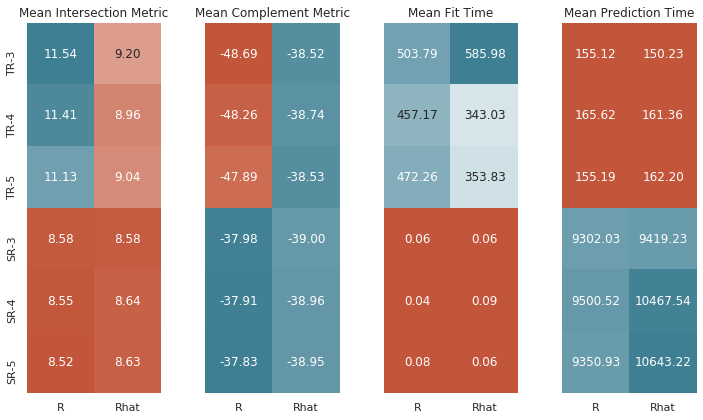

In [112]:
fig, ax = plt.subplots(1, 4, figsize=(10,6))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Rint = get_idx(recipe_R_int, 0).mean().rename('R')
Rhatint = get_idx(recipe_Rhat_int, 0).mean().rename('Rhat')
ints = pd.concat([Rint, Rhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")

#Complement
Rcom = get_idx(recipe_R_com, 0).mean().rename('R')
Rhatcom = get_idx(recipe_Rhat_com, 0).mean().rename('Rhat')
coms = pd.concat([Rcom, Rhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Rhat = (get_idx(recipe_Rhat_com, 1) + get_idx(recipe_Rhat_int, 1)).mean().rename('Rhat')/2
R = (get_idx(recipe_R_com, 1) + get_idx(recipe_R_int, 1)).mean().rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Rhat = (get_idx(recipe_Rhat_com, 2) + get_idx(recipe_Rhat_int, 2)).mean().rename('Rhat')/2
R = (get_idx(recipe_R_com, 2) + get_idx(recipe_R_int, 2)).mean().rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])


plt.tight_layout()
plt.savefig("figs/recipe_rdr.pdf", bbox_inches="tight")
plt.show()

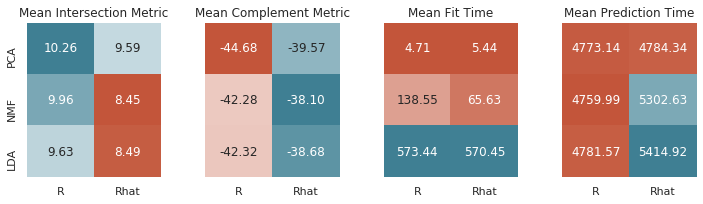

In [113]:
fig, ax = plt.subplots(1, 4, figsize=(10,3))
cmap = sns.diverging_palette(20, 220, n=200)


#User Intersection
Rint = get_idx(recipe_R_int, 0).mean(axis=1).rename('R')
Rhatint = get_idx(recipe_Rhat_int, 0).mean(axis=1).rename('Rhat')
ints = pd.concat([Rint, Rhatint], axis=1)
sns.heatmap(ints, annot=True, ax=ax[0], cmap=cmap, cbar=False, fmt='.2f')
ax[0].set_title("Mean Intersection Metric")

#Complement
Rcom = get_idx(recipe_R_com, 0).mean(axis=1).rename('R')
Rhatcom = get_idx(recipe_Rhat_com, 0).mean(axis=1).rename('Rhat')
coms = pd.concat([Rcom, Rhatcom], axis=1)
sns.heatmap(coms, annot=True, ax=ax[1], cmap=cmap, cbar=False, fmt='.2f')
ax[1].set_title("Mean Complement Metric")
ax[1].get_yaxis().set_ticks([])

#Time to fit
Rhat = (get_idx(recipe_Rhat_com, 1) + get_idx(recipe_Rhat_int, 1)).mean(axis=1).rename('Rhat')/2
R = (get_idx(recipe_R_com, 1) + get_idx(recipe_R_int, 1)).mean(axis=1).rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[2], cmap=cmap, cbar=False, fmt='.2f')
ax[2].set_title("Mean Fit Time")
ax[2].get_yaxis().set_ticks([])

#Time to predict
Rhat = (get_idx(recipe_Rhat_com, 2) + get_idx(recipe_Rhat_int, 2)).mean(axis=1).rename('Rhat')/2
R = (get_idx(recipe_R_com, 2) + get_idx(recipe_R_int, 2)).mean(axis=1).rename('R')/2

coms = pd.concat([R, Rhat], axis=1)
sns.heatmap(coms, annot=True, ax=ax[3], cmap=cmap, cbar=False, fmt='.2f')
ax[3].set_title("Mean Prediction Time")
ax[3].get_yaxis().set_ticks([])


plt.tight_layout()
plt.savefig("figs/recipe_dr.pdf", bbox_inches="tight")
plt.show()

In [96]:
Rint = get_idx(recipe_R_int, 0).sum(axis=1).rename('R')

In [97]:
Rint

PCA    61.570702
NMF    59.780394
LDA    57.804047
Name: R, dtype: float64